In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('datasets/satandar.csv', nrows = 40000)
df.shape

(40000, 371)

In [5]:
df.columns

Index(['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3',
       ...
       'saldo_medio_var33_hace2', 'saldo_medio_var33_hace3',
       'saldo_medio_var33_ult1', 'saldo_medio_var33_ult3',
       'saldo_medio_var44_hace2', 'saldo_medio_var44_hace3',
       'saldo_medio_var44_ult1', 'saldo_medio_var44_ult3', 'var38', 'TARGET'],
      dtype='object', length=371)

In [6]:
x = df.drop('TARGET', axis = 1) #remove targt column from df
x.shape

(40000, 370)

In [7]:
z = np.array([6,4,8,7,3,9,5])
z.var()

4.0

In [8]:
var_z = np.mean((z-z.mean())**2) #variance of z using formula

4.0

In [10]:
z1 = np.zeros(8)+5
z1

array([5., 5., 5., 5., 5., 5., 5., 5.])

In [11]:
z1.var()

0.0

In [12]:
# variance threshold 
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(threshold = 0)
vt.fit(x)

VarianceThreshold(threshold=0)

In [13]:
vt.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [14]:
sum(vt.get_support()) 

320

In [24]:
x_new = x.iloc[:,vt.get_support()] #constant features were removed
x_new.shape

(40000, 320)

In [25]:
#Duplicated feature removal in colums not possible so it must be transformed
xt = x.T
xt.shape

(370, 40000)

In [26]:
xt.duplicated()

ID                         False
var3                       False
var15                      False
imp_ent_var16_ult1         False
imp_op_var39_comer_ult1    False
                           ...  
saldo_medio_var44_hace2    False
saldo_medio_var44_hace3    False
saldo_medio_var44_ult1     False
saldo_medio_var44_ult3     False
var38                      False
Length: 370, dtype: bool

In [27]:
sum(xt.duplicated()) # find duplicated columns

79

In [28]:
xt.drop_duplicates(inplace = True) # remove duplicate columns
x = xt.T
x.shape

(40000, 291)

In [39]:
# remove correlated features
a = np.array([12,34,68,52,54,18,98,93,87])
b = np.array([2,84,82,65,99,71,77,73,86])
c= np.array([50,62,76,79,82,89,90,92,98])
d= np.array([60,72,86,89,92,95,91,93,99])

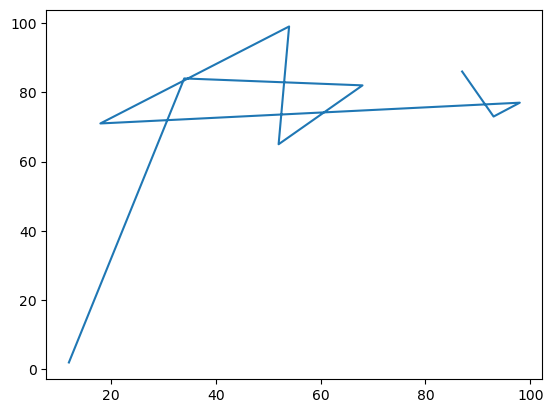

In [40]:
plt.plot(a,b)

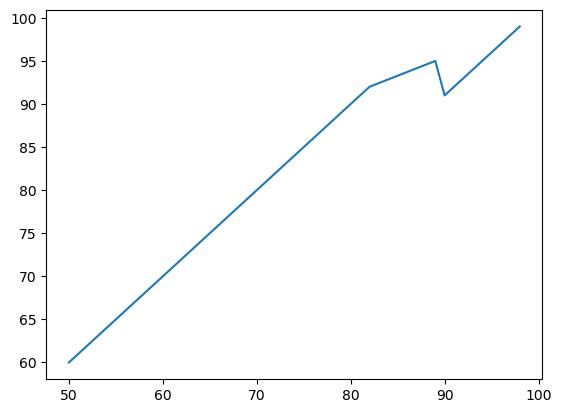

In [31]:
plt.plot(c,d)

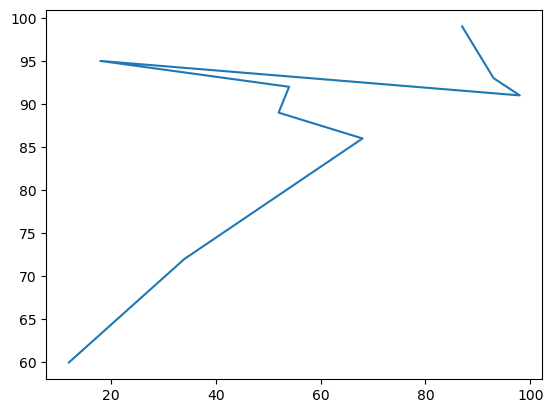

In [32]:
plt.plot(a,d)

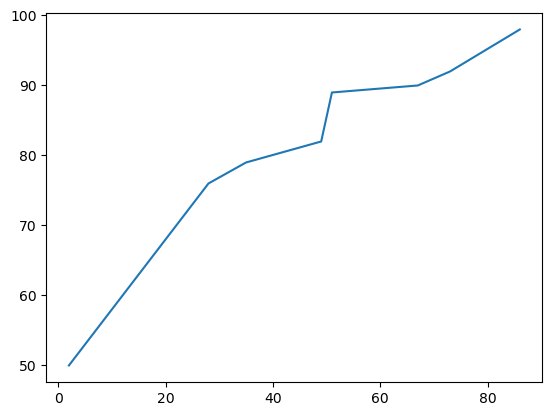

In [33]:
plt.plot(b,c)

In [34]:
np.corrcoef(a,b)

array([[1.        , 0.76242399],
       [0.76242399, 1.        ]])

In [35]:
np.corrcoef(b,c)

array([[1.        , 0.95786368],
       [0.95786368, 1.        ]])

In [36]:
np.corrcoef(a,d)

array([[1.       , 0.6163259],
       [0.6163259, 1.       ]])

In [37]:
np.corrcoef(a,c)

array([[1.        , 0.70209461],
       [0.70209461, 1.        ]])

In [38]:
np.corrcoef(a,a)

array([[1., 1.],
       [1., 1.]])

In [75]:
df = pd.read_csv('datasets/paribas.csv', nrows = 20000)
df.shape

(20000, 133)

In [76]:
df.columns

Index(['ID', 'target', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8',
       ...
       'v122', 'v123', 'v124', 'v125', 'v126', 'v127', 'v128', 'v129', 'v130',
       'v131'],
      dtype='object', length=133)

In [77]:
y = df.drop('target', axis = 1)

In [78]:
y.shape

(20000, 132)

In [79]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Columns: 132 entries, ID to v131
dtypes: float64(108), int64(5), object(19)
memory usage: 20.1+ MB


In [80]:
#corre of numeric but not for string
cols = ['int64', 'float64']
numerical_columns = list(y.select_dtypes(include = cols).columns)

In [81]:
len(numerical_columns)

113

In [82]:
y = y[numerical_columns] #dataset without string columns it has only number bcz corr operator works only numbers

In [83]:
y.shape

(20000, 113)

In [84]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Columns: 113 entries, ID to v131
dtypes: float64(108), int64(5)
memory usage: 17.2 MB


In [89]:
correlated_features = set()
correlation_matrix = x.corr()

In [90]:
correlation_matrix

,ID,v1,v2,v4,v5,v6,v7,v8,v9,v10,...,v121,v122,v123,v124,v126,v127,v128,v129,v130,v131
ID,1.000000,0.004817,0.001134,-0.003499,0.002015,-0.010675,-0.002102,-0.002202,0.000506,0.000844,...,0.017562,-0.001780,0.007956,0.001076,-0.003765,0.002461,0.001904,-0.004063,0.010092,-0.003948
v1,0.004817,1.000000,-0.205826,-0.145037,-0.049337,-0.020251,0.089950,0.160309,-0.035394,-0.006785,...,0.340779,-0.137999,0.292999,0.164169,0.025936,-0.018762,-0.010806,-0.015788,0.253119,0.709122
v2,0.001134,-0.205826,1.000000,0.542216,0.195646,0.025525,0.351704,-0.367639,-0.012757,0.055303,...,-0.571877,0.169172,-0.592534,-0.261420,-0.111644,0.011387,0.259107,0.074142,-0.576703,0.183870
v4,-0.003499,-0.145037,0.542216,1.000000,0.251530,0.387779,0.483067,-0.179696,-0.191921,0.085467,...,-0.618385,0.058058,-0.711291,-0.063270,-0.130919,0.299857,0.487635,0.109600,-0.702047,0.304914
v5,0.002015,-0.049337,0.195646,0.251530,1.000000,0.238449,0.045411,0.003512,-0.168616,0.045830,...,-0.341398,0.012811,-0.217315,0.080085,-0.102563,-0.224641,0.600132,0.045623,-0.240718,0.153459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
v127,0.002461,-0.018762,0.011387,0.299857,-0.224641,0.169701,0.247932,-0.015149,0.123628,0.002826,...,0.017564,0.094302,-0.162525,-0.050666,-0.079944,1.000000,-0.161000,-0.001564,-0.244848,0.054744
v128,0.001904,-0.010806,0.259107,0.487635,0.600132,0.240302,0.088061,0.019486,-0.268033,0.054684,...,-0.372598,-0.043031,-0.256838,0.279839,-0.154822,-0.161000,1.000000,0.059893,-0.287794,0.243623
v129,-0.004063,-0.015788,0.074142,0.109600,0.045623,0.050278,0.041350,-0.019332,-0.035212,0.505573,...,-0.090282,0.005121,-0.101049,-0.009529,-0.024423,-0.001564,0.059893,1.000000,-0.082056,0.045038
v130,0.010092,0.253119,-0.576703,-0.702047,-0.240718,-0.304129,-0.625145,0.323090,0.084667,-0.072778,...,0.809328,-0.190182,0.727563,0.227784,0.080568,-0.244848,-0.287794,-0.082056,1.000000,-0.264040


In [93]:
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i,j])>0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [94]:
len(correlated_features)

55

In [95]:
y = x.drop(correlated_features, axis = 1)

In [96]:
y.shape

(20000, 58)

In [97]:
# chi2 technique
df = pd.read_csv('datasets/wisc_bc_data.csv')

In [98]:
df.shape

(569, 32)

In [99]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [100]:
x = df.drop(['id', 'diagnosis'], axis = 1) #delete id and diagnosis(output) bcz they are not important features

In [101]:
x.shape

(569, 30)

In [102]:
from sklearn.feature_selection import SelectKBest, chi2 #select important most imp features for devolopment of ml model

In [103]:
skf = SelectKBest(k = 5, score_func =chi2)

In [104]:
skf.fit(x, df['diagnosis'])

SelectKBest(k=5, score_func=<function chi2 at 0x000001FAB590D800>)

In [105]:
skf.get_support()

array([False, False,  True,  True, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False])

In [106]:
x.iloc[:,skf.get_support()]

,perimeter_mean,area_mean,area_se,perimeter_worst,area_worst
0,122.80,1001.0,153.40,184.60,2019.0
1,132.90,1326.0,74.08,158.80,1956.0
2,130.00,1203.0,94.03,152.50,1709.0
3,77.58,386.1,27.23,98.87,567.7
4,135.10,1297.0,94.44,152.20,1575.0
...,...,...,...,...,...
564,142.00,1479.0,158.70,166.10,2027.0
565,131.20,1261.0,99.04,155.00,1731.0
566,108.30,858.1,48.55,126.70,1124.0
567,140.10,1265.0,86.22,184.60,1821.0
